# Air Quality Index

## ML model to be used

- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor
- KNN Regressor*
- RandomForestRegressor
- Xgboost Regressor
- ANN- Artificial Neural Network


## K-Nearest Neighbors Regressor for training the data

In [47]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
#Reading the dataframe
data_frame=pd.read_csv('AQI_data.csv')

In [50]:
data_frame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [51]:
x=data_frame.iloc[:,:-1]#independent features
y=data_frame.iloc[:,-1]#dependent feature

## Spliting the data

In [52]:
#spliting the data by dividing into 70% for training data and 30% for test data

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

- x_train and y_train are used for training the model.
- x_test and y_test are used for test the model.

In [54]:
#initializing the model

In [55]:
model=KNeighborsRegressor()

In [56]:
#fitting the model with data

In [57]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
#testing the data with test data
model.score(x_test,y_test)

0.5491808529670075

In [59]:
#testing the data with train data
model.score(x_train,y_train)

0.7020375433790301

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
#cross validation for test data
score=cross_val_score(model,x_test,y_test,cv=5)
score.mean()

0.44367142556959427

In [62]:
#cross validation for train data
score=cross_val_score(model,x_train,y_train,cv=5)
score.mean()

0.5241118061865706

## Evaluating the model

In [63]:
#chekcing the predictions

In [64]:
predictions=model.predict(x_test)

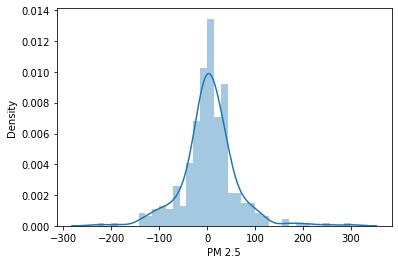

In [65]:
sns.distplot(predictions-y_test);

Text(0.5, 1.0, 'Relation between the y_test and predicted values')

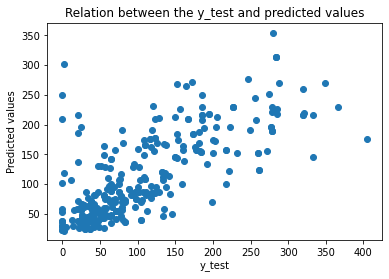

In [66]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');
plt.title('Relation between the y_test and predicted values')

## Evaluating the model using the most common evaluation metrics from scratch

- MAE:- Mean Absolute Error
- MSE:- Mean Squared Error
- RSME:- Root Mean Squared Error

In [67]:
#python module for metrics
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  38.135335365853656
MSE:  3229.5788319063345
RMSE:  56.82938352565805


## We got good accuracy, so we will perform hyperparameter tuning to get even better accuracy.

## Hyperparameter tuning for KNNRegressor

**Using Random search where the model the picks the given parameters randomly and tune the model.**

In [68]:
accuracy_rate = []

for i in range(1,40):    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

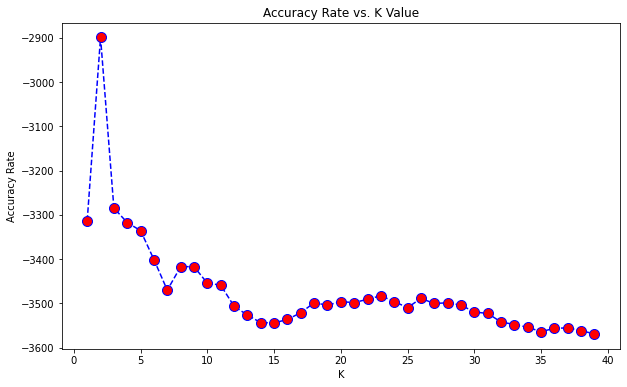

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value');
plt.xlabel('K');
plt.ylabel('Accuracy Rate');

In [70]:
#let's take our very first k=1
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=1)

## Evaluating the model

In [71]:
score=knn.score(x_test,y_test)
print('Score: ',score)

Score:  0.5417545333477789


In [72]:
predictions=knn.predict(x_test)

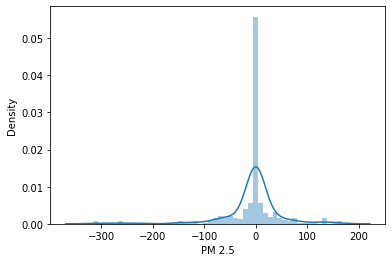

In [73]:
sns.distplot(y_test-predictions);

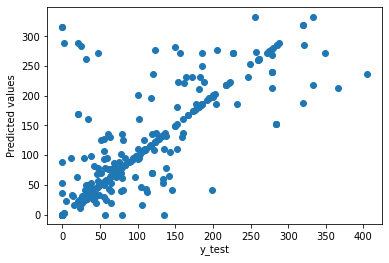

In [74]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');

In [75]:
#let's take k=39 and try

In [76]:
#let's take our very first k=1
knn = KNeighborsRegressor(n_neighbors=39)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=39)

In [77]:
score=knn.score(x_test,y_test)
print('Score: ',score)

Score:  0.49689152150244287


In [78]:
predictions=knn.predict(x_test)

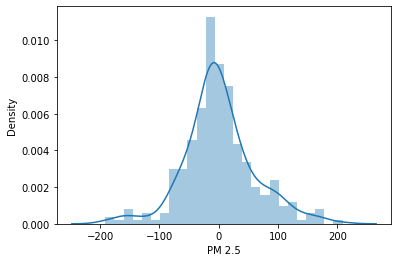

In [79]:
sns.distplot(y_test-predictions);

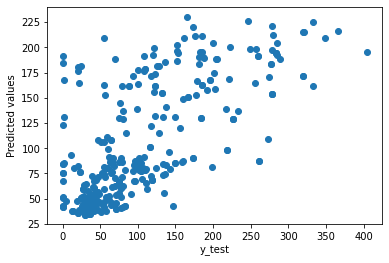

In [80]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');